In [ ]:
# Service satisfaction Prediction

# Import dataset
import numpy as np
import pandas as pd

service_train  = pd.read_csv("Invistico_Airline.csv")

In [ ]:
# view dimensions of dataset
service_train.shape

(129880, 23)

In [ ]:
# view summary of dataset
service_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
# find categorical variables
categorical = [var for var in service_train.columns if service_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)
service_train[categorical].head()

There are 5 categorical variables

The categorical variables are :

 ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco


In [ ]:
#replace satisfaction value, 1 is satisfied, 0 is dissatisfied
service_train.replace(to_replace="satisfied", value=1, inplace=True)
service_train.replace(to_replace="dissatisfied", value=0, inplace=True)

In [ ]:
#check 'satisfaction'
service_train['satisfaction']

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64

In [ ]:
# check missing values in categorical variables
service_train[categorical].isnull().sum()

satisfaction      0
Gender            0
Customer Type     0
Type of Travel    0
Class             0
dtype: int64

In [ ]:
# view frequency counts of values in categorical variables
for var in categorical: 
    
    print(service_train[var].value_counts())

1    71087
0    58793
Name: satisfaction, dtype: int64
Female    65899
Male      63981
Name: Gender, dtype: int64
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


In [ ]:
# check for cardinality in categorical variables
for var in categorical:
    
    print(var, ' contains ', len(service_train[var].unique()), ' labels')

satisfaction  contains  2  labels
Gender  contains  2  labels
Customer Type  contains  2  labels
Type of Travel  contains  2  labels
Class  contains  3  labels


In [ ]:
# find numerical variables
numerical = [var for var in service_train.columns if service_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)
service_train[numerical].head()

There are 19 numerical variables

The numerical variables are : ['satisfaction', 'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# check missing values in numerical variables
service_train[numerical].isnull().sum()

satisfaction                           0
Age                                    0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
# replace 'NaN' values in Arrival Delay in Minutes variable with 0
service_train['Arrival Delay in Minutes'].replace(np.nan, 0, inplace=True)

In [ ]:
# check missing values in numerical variables again
service_train[numerical].isnull().sum()

satisfaction                         0
Age                                  0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
#Declare feature vector and target variable
X = service_train.drop(['satisfaction'], axis=1)

y = service_train['satisfaction']

In [ ]:
from sklearn import model_selection 
 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.2, random_state=55)

In [ ]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [ ]:
# import category encoders
!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 82 kB 375 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Gender_1,Gender_2,Customer Type_1,Customer Type_2,Age,Type of Travel_1,Type of Travel_2,Class_1,Class_2,Class_3,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
83820,1,0,1,0,52,1,0,1,0,0,2186,3,2,2,2,1,2,2,3,3,3,3,3,3,3,0,0.0
28529,1,0,1,0,52,0,1,0,1,0,3005,3,5,2,4,2,2,2,3,2,5,4,2,5,2,154,148.0
98698,1,0,1,0,50,1,0,0,1,0,1375,4,2,2,2,4,4,4,4,3,2,5,4,4,4,6,0.0
125621,0,1,1,0,48,1,0,1,0,0,2421,2,2,2,2,5,4,5,5,5,5,5,3,5,4,44,64.0
121016,1,0,1,0,30,1,0,1,0,0,4267,3,3,3,3,5,5,5,5,3,2,4,5,4,5,0,0.0


In [ ]:
X_test.head()

,Gender_1,Gender_2,Customer Type_1,Customer Type_2,Age,Type of Travel_1,Type of Travel_2,Class_1,Class_2,Class_3,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
77994,0,1,1,0,25,1,0,1,0,0,2847,3,3,3,3,3,2,3,3,1,5,2,2,4,3,59,47.0
11151,1,0,1,0,38,0,1,1,0,0,737,2,3,2,3,3,1,4,5,5,2,4,5,5,3,1,16.0
29523,1,0,1,0,54,0,1,0,1,0,2343,3,5,3,2,2,3,2,2,3,2,2,5,2,2,0,0.0
39422,1,0,1,0,52,0,1,0,0,1,2132,5,4,5,5,2,5,2,2,5,2,5,4,5,2,21,12.0
39773,0,1,1,0,29,0,1,0,1,0,2081,5,5,5,3,5,5,4,5,4,3,4,5,4,5,0,0.0


In [ ]:
#  Building Random Forest Model
# set K = 700

from sklearn import ensemble
R_forest= ensemble.RandomForestClassifier(n_estimators=700, random_state=0)
R_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=700, random_state=0)

Random Forest Accuracy on Train data =  1.0


Text(0.5, 257.44, 'Predicted label')

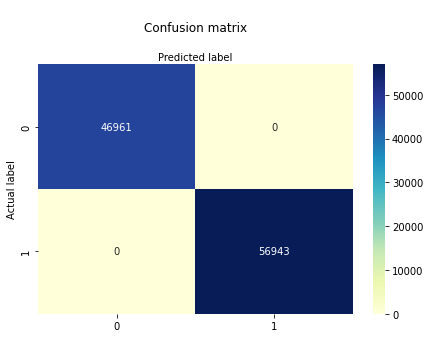

In [ ]:
# Accuracy on train data 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

forest_predict1=R_forest.predict(X_train)
cm1 = confusion_matrix(y_train, forest_predict1)
accuracy_train=(cm1[0,0]+cm1[1,1])/sum(sum(cm1))
print("Random Forest Accuracy on Train data = ", round(accuracy_train,2))

# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Random Forest Accuracy on Test data =  0.96


Text(0.5, 257.44, 'Predicted label')

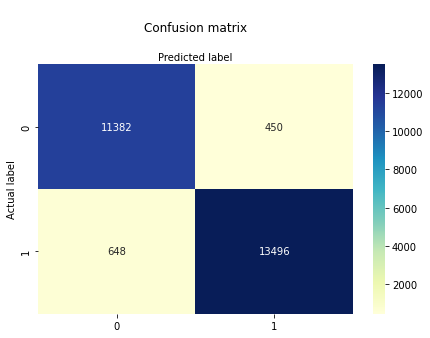

In [ ]:
# Accuracy on test data 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

forest_predict2=R_forest.predict(X_test)
cm2 = confusion_matrix(y_test, forest_predict2)
accuracy_test=(cm2[0,0]+cm2[1,1])/sum(sum(cm2))
print("Random Forest Accuracy on Test data = ", round(accuracy_test,2))

# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
 # AUC on Train data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, forest_predict1)
auc_train = auc(false_positive_rate, true_positive_rate)
print("Random Forest AUC on Train data = ", round(auc_train,2))

Random Forest AUC on Train data =  1.0


In [ ]:
# AUC on Test data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_predict2)
auc_test = auc(false_positive_rate, true_positive_rate)
print("Random Forest AUC on Test data = ", round(auc_test,2))

Random Forest AUC on Test data =  0.96


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,forest_predict2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11832
           1       0.97      0.95      0.96     14144

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
#Key Feature
feature_score = pd.Series(R_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_score

Inflight entertainment               0.196079
Seat comfort                         0.124823
Ease of Online booking               0.073253
Online support                       0.063246
On-board service                     0.039574
Food and drink                       0.037689
Leg room service                     0.035712
Online boarding                      0.033717
Flight Distance                      0.031199
Age                                  0.028842
Customer Type_2                      0.028167
Customer Type_1                      0.027953
Checkin service                      0.025620
Baggage handling                     0.025409
Cleanliness                          0.023472
Gender_2                             0.023328
Class_1                              0.023163
Gender_1                             0.022433
Departure/Arrival time convenient    0.020449
Type of Travel_2                     0.020035
Type of Travel_1                     0.019335
Gate location                     

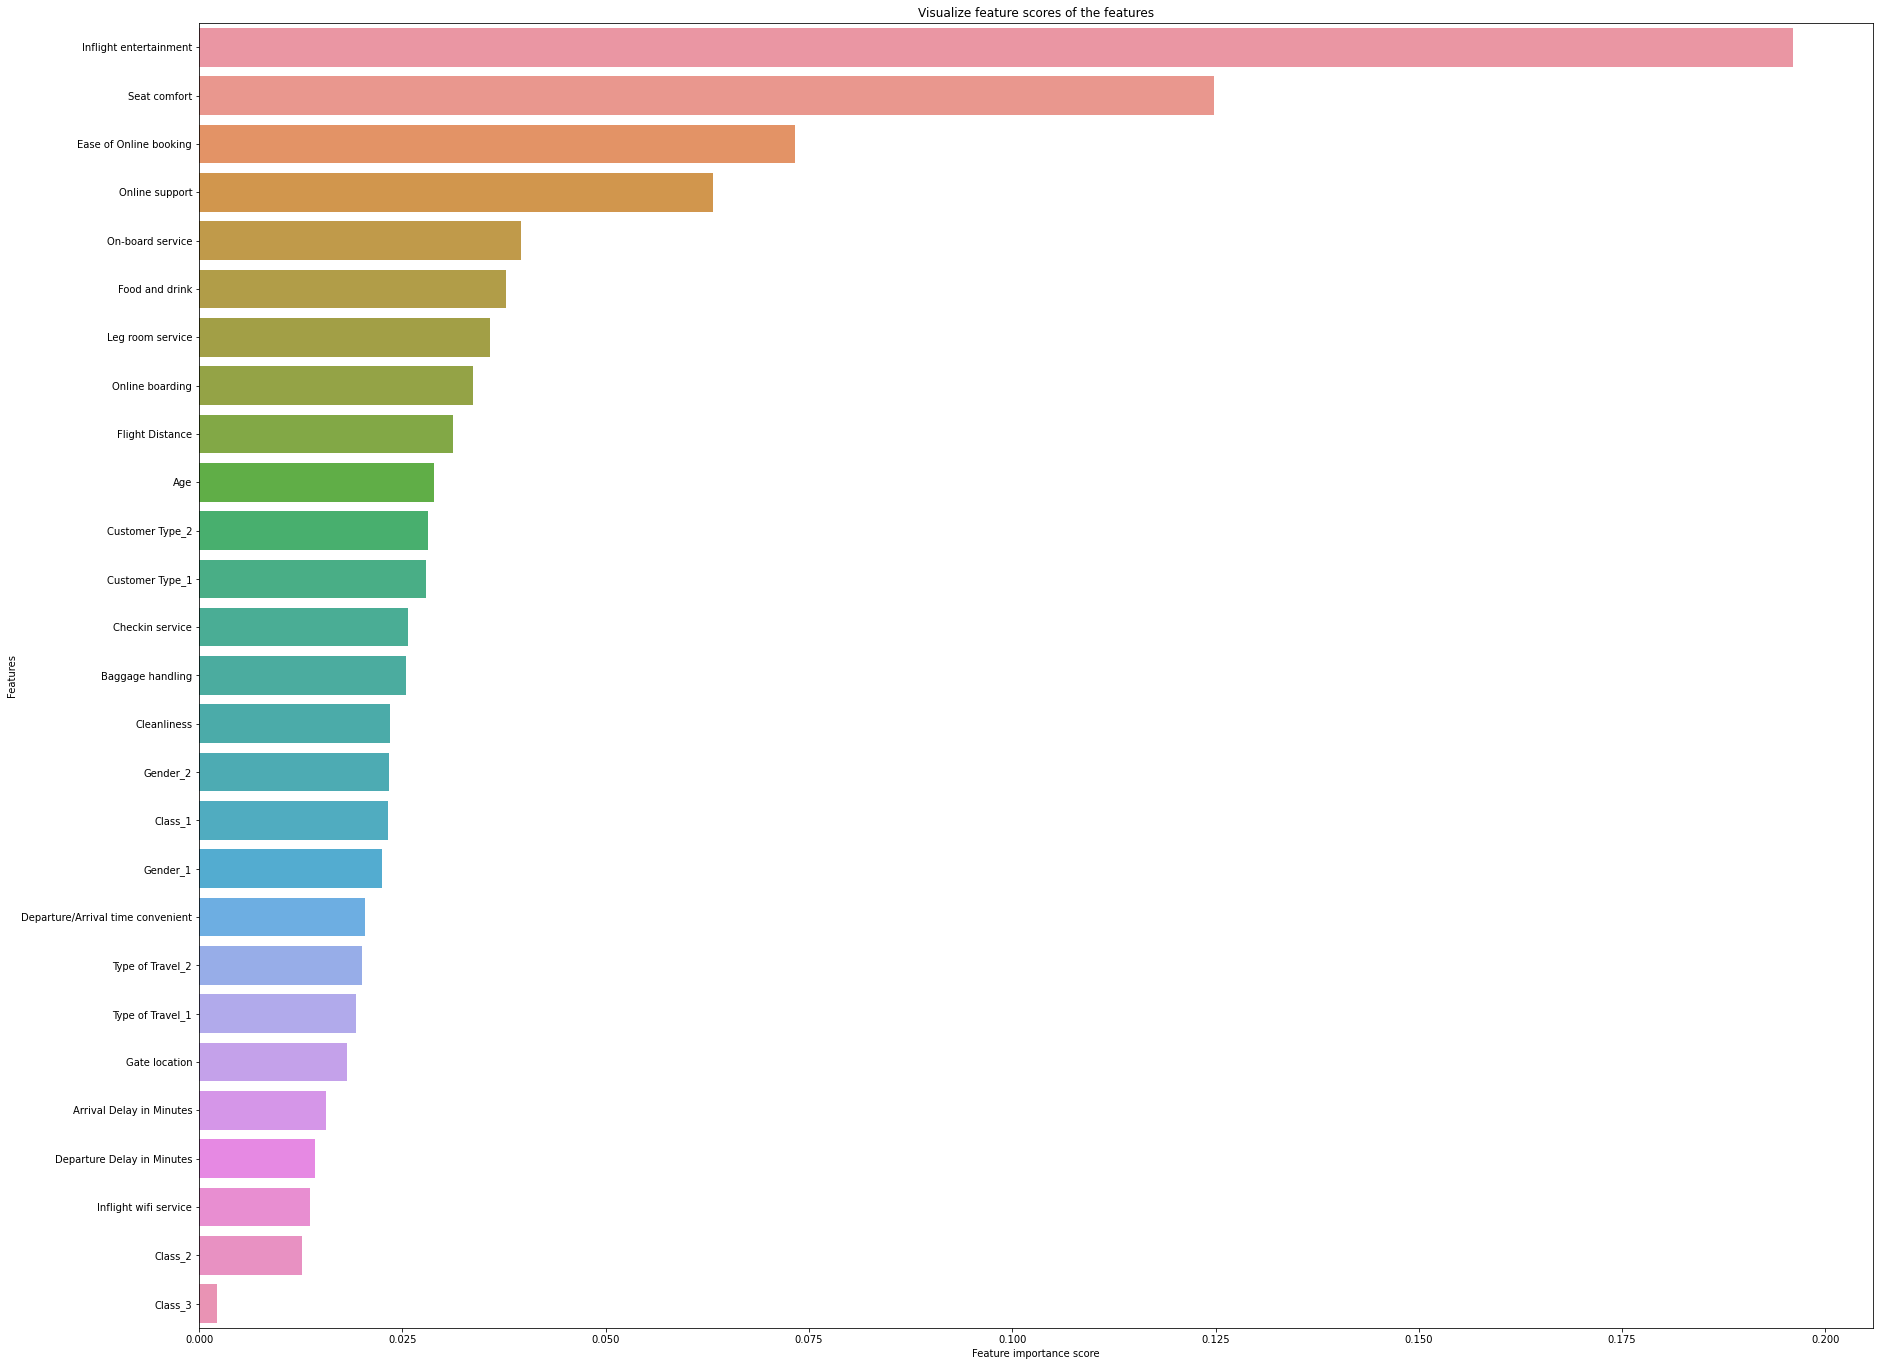

In [ ]:
#Graph of Key Feature
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_score, y=feature_score.index, data=service_train)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_score.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()